In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "/Users/davidspector/Downloads/85300606_20230814_093203_0000_TRUS.nii.gz"

In [3]:
im = nib.load(path, mmap=False)

In [4]:
ar = im.get_fdata()
print(ar.shape)

(992, 440, 1818, 1, 3)


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [   5  992  440 1818    1    3    1    1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : vector
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1.  0.4 0.4 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : -0.0
qoffset_y       : -0.0
qoffset_z       : 0.0
srow_x          : [-0.4  0.   0.  -0.

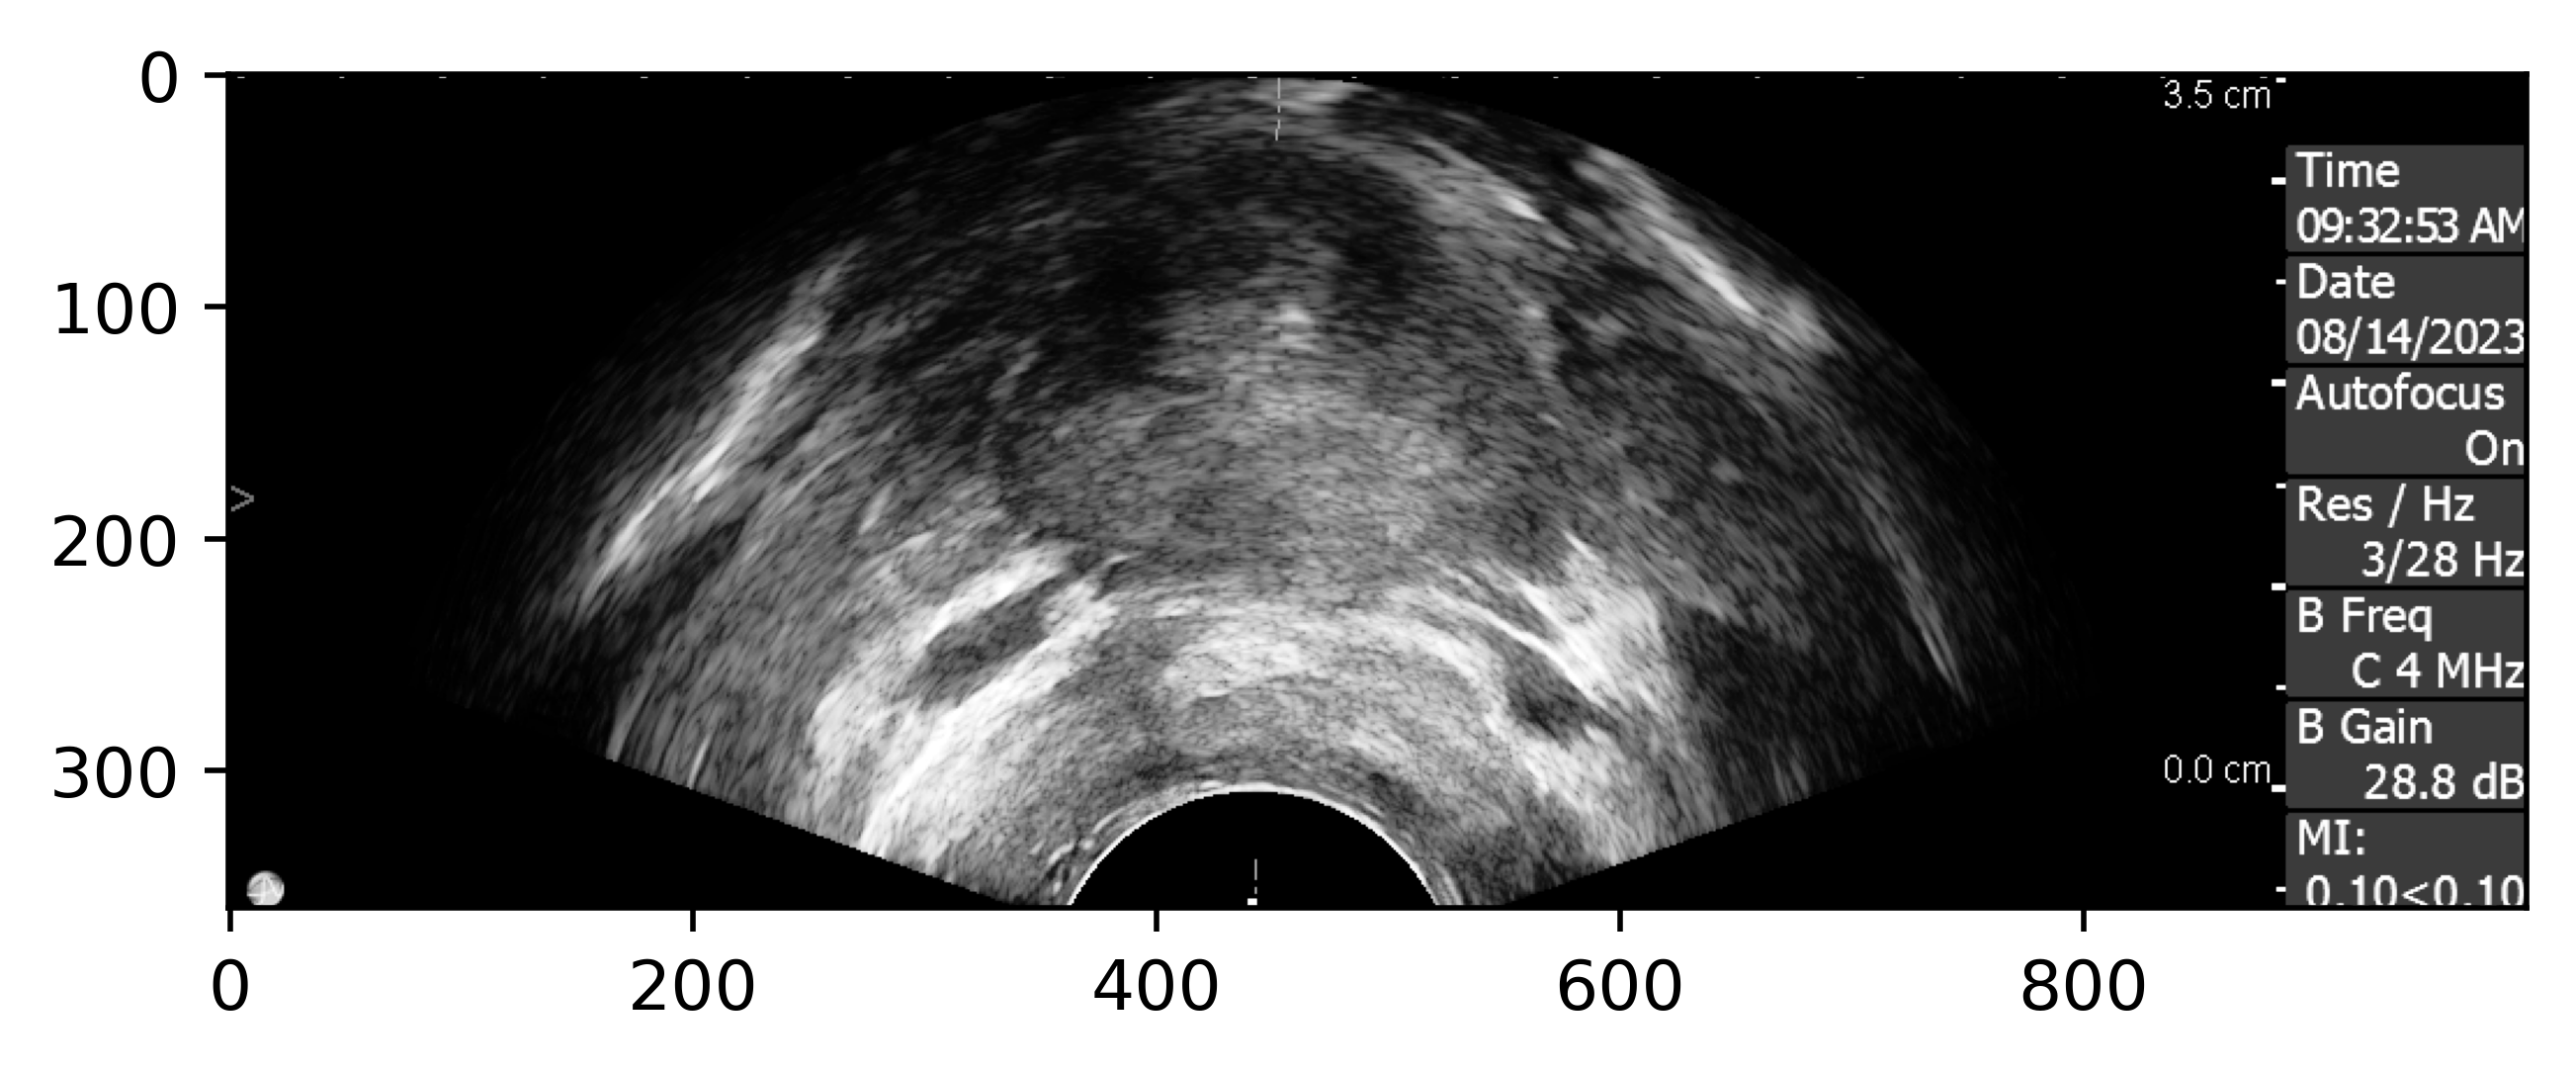

In [13]:
plt.figure(dpi=500)
plt.imshow(np.transpose(ar[:,:360,1000,:,0]).reshape((360, 992)).astype(np.uint8), cmap="Greys_r")
print(im.header)

In [6]:
new_path = "/Users/davidspector/Downloads/85300606_20230814_093203_0000_CEUS.nii.gz"
new_im = nib.load(new_path, mmap=False)
new_ar = new_im.get_fdata()
print(new_ar.shape)

(992, 360, 1818, 1, 3)


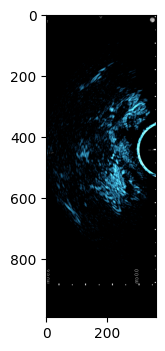

In [24]:
plt.figure(dpi=100)
plt.imshow(new_ar[:,:,1000,:,:].reshape((992, 360, 3)).astype(np.uint8), cmap="Greys_r")

In [31]:
new_ar_org = new_ar.reshape((992, 360, 1818, 3))
av_ar = np.zeros((992, 360, 1818))
for x in range(new_ar.shape[0]):
    for y in range(new_ar.shape[1]):
        for z in range(new_ar.shape[2]):
            av_ar[x,y,z] = (new_ar_org[x,y,z,0]+new_ar_org[x,y,z,1]+new_ar_org[x,y,z,2])/3

KeyboardInterrupt: 

In [33]:
new_ar_org = new_ar.reshape((992, 360, 1818, 3))
hi = np.mean(new_ar_org, axis=3)
print(hi.shape)

(992, 360, 1818)


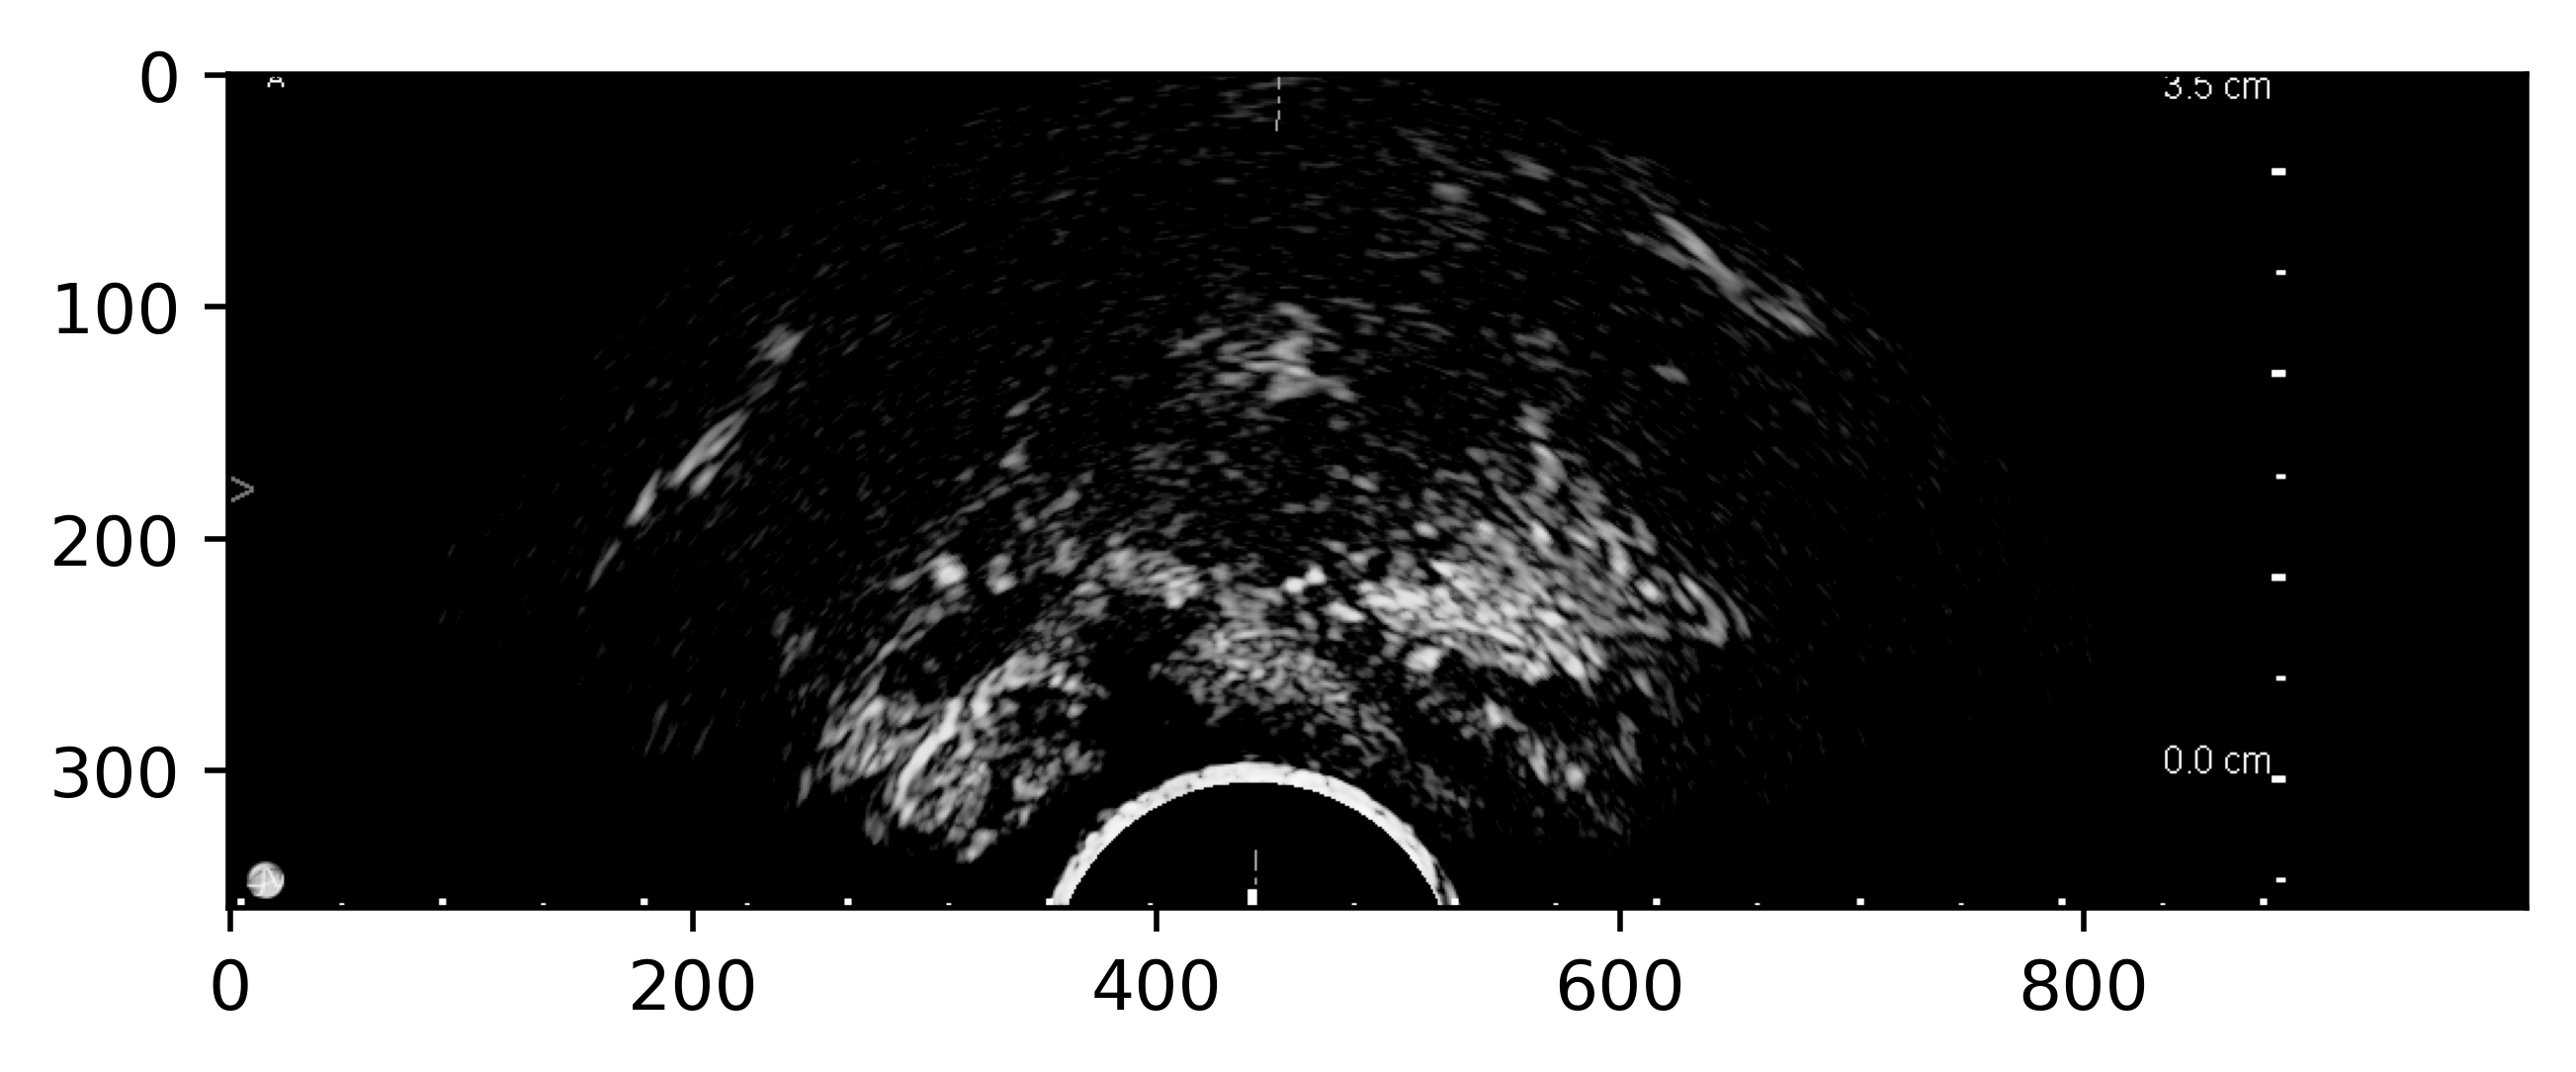

: 

In [39]:
plt.figure(dpi=500)
plt.imshow(np.transpose(hi[:,:,1000]).astype(np.uint8), cmap="Greys_r")